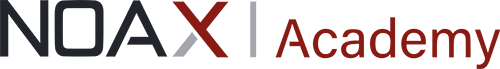

# ¡Selecciona variables con la regresión lasso!
#### **Álvaro Méndez Civieta** 

Este cuaderno complementa al artículo del blog de NOAX Academy. ¡Léelo ahora!

¡Hola amig@os de NOAX!

En este post hablaremos de la técnica de selección de variables más famosa del mundo: **la regresión lasso**. Aquí veremos:

* Por qué surge la regresión lasso.
* Su formulación matemática.
* Intuitivamente, ¿cómo funciona?
* Un ejemplo en python comparando un modelo de regresión no penalizada, la regresión ridge, y la regresión lasso.

Recordad que en una entrada anterior del blog [ya hablamos de los modelos de regresión lineal](https://blog.noaxacademy.com/el-abc-del-machine-learning-regresion-lineal-con-python/), y en otra entrada [hablamos de los modelos de regresión penalizada ridge.](https://blog.noaxacademy.com/la-regresion-ridge-con-python-o-como-evitar-el-overfitting/) ¡Si no las habéis leído os las recomiendo! 

## Los problemas de alta dimensión

Los modelos de regresión llevan usandose desde hace décadas para hacer predicciones. Por ejemplo, los bancos los usaban para predecir la fiabilidad de sus clientes a la hora de devolver los pagos. En esa época, el número de observaciones en la base de datos (en nuestro ejemplo, los clientes del banco) era bastante mayor que el número de variables (la información socioeconómica que el banco tuviese de cada cliente). Sin embargo, **en los últimos años la cantidad de información disponible se ha disparado**, haciendo que sea más y más común trabajar con bases de datos en las que **el número de variables es muy grande**. Esto ocurre por ejemplo cuando se trabaja con bases de datos biomédicas en las que se mide la información genética de un paciente. Para cada paciente (esa sería nuestra observación) tenemos miles de variables (sus genes). Pero también ocurre cuando trabajamos con imágenes, información económica etc.



![high_dim](http://blog.noaxacademy.com/wp-content/uploads/2021/12/high_dimension_vs_low.png)

**Figura 1 |** La forma de la matriz de datos en problemas de baja y de alta dimensión. Las columnas son las variables y las filas son las observaciones.

Esto es lo que llamamos el **problema de la alta dimensión**. Y realmente es un problema, porque el hecho de tener más información disponible no implica que toda esa información esté directamente relacionada con las prediccicones que nosotros queramos hacer. Es decir, al aumentar el número de variables en el modelo es muy posible que **parte de esas variables no aporten nada útil**, que simplemente sean ruido en el modelo. Es más, matemáticamente la situación se complica especialmente cuando el número de variables es mayor que el de observaciones, porque **en esa situación los modelos de regresión tradicionales directamente no son resolubles.**


## La matemática de la regresión lasso

La solución a todo este problema es usar modelos de regresión penalizados. [En la entrada anterior ya vimos la penalización ridge]((https://blog.noaxacademy.com/la-regresion-ridge-con-python-o-como-evitar-el-overfitting/) ), una de las penalizaciones más utilizadas. Sin embargo, **la penalización ridge no es eficaz cuando el número de variables es muy grande porque es incapaz de seleccionar las variables más importantes.** Queremos utilizar una penalización que sea capaz de seleccionar, de entre todas las variables de la base de datos, aquellas que sean más importantes. Y aquí es donde entra el least absolute shrinkage and selection operator, o lasso para los amigos. El lasso resuelve la ecuación,

$$
J(\beta)=\text{min}\left\{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2+\alpha\sum_{j=1}^p|\beta_j|\right\}
$$

Todos los que hayais estado atentos al blog vereis que la ecuación es muy parecida a la de la regresión ridge. El único cambio (pero uno importante) es que **la regresión ridge es una penalización sobre el valor al cuadrado** de los coeficientes, y el **lasso es una penalización sobre el valor absoluto.**

## Intuitivamente... ¿cómo funciona?

Vamos a ver cómo funcionan el ridge y el lasso, y por qué con un cambio tan pequeño el lasso es capaz de seleccionar variables. Y como siempre os digo, con una imagen todo se entiende mejor. 

![regresion_unpenalized](http://blog.noaxacademy.com/wp-content/uploads/2021/12/red_elipsoids.png)

**Figura 2 |** Modelo de regresión con dos variables $\beta_1$ y $\beta_2$. Los elipsoides rojos son las lineas de contorno del error según nos alejamos del valor óptimo $\hat\beta$.

Imaginemos que en nuestra base de datos solo tenemos dos variables $x_1$ y $x_2$ y para cada variable tenemos un coeficiente de regresión $\beta_1$ y $\beta_2$. La solución del modelo de regresión no penalizado es $\hat\beta$. Ahora imaginemos que vamos dando distintos valores a $\beta_1$ y $\beta_2$, y para cada combinación de valores comprobamos cual sería el error de predicción de nuestro modelo, Eso es lo que vemos en la **Figura 2**. Cada punto de esos elipsoides rojos es una posible combinación de $\beta_1$ y $\beta_2$ asociada a un mismo valor del error. Cuanto más lejos estamos del valor óptimo, $\hat\beta$, mayor es el error. Veamos cómo influyen las penalizaciones aquí.

![ridge_lasso](http://blog.noaxacademy.com/wp-content/uploads/2021/12/lasso_ridge_pens.png)

**Figura 3 |** Lado izquierdo: penalización lasso. Lado derecho: penalización ridge.

En la parte derecha de la **Figura 3** podemos ver la **penalización ridge.** Gráficamente la suma de los coeficientes al cuadrado se representa como un círculo, por lo que esta penalización tiene la forma de círculo azul de la imagen. **La solución óptima del modelo de regresión ridge será el primer punto en el que los elipsoides rojos toquen al círculo azul.** A efectos prácticos, lo que ridge hará será reducir el valor de todos los coeficientes, pero de una forma más o menos proporcional, es decir, no eliminará ningún coeficiente. En este caso las predicciones con el modelo ridge utilizan ambas variables $x_1$ y $x_2$.

Por otro lado, a la izquierda tenemos la **penalización lasso.** Gráficamente la suma de los valores absolutos se puede representar como un rombo, así que esta penalización tiene esa forma de rombo azul de la imagen izquierda. Y nuevamente **la solución de la regresión lasso será el primer punto en que los elipsoides rojos toquen al rombo azul.** Y aquí viene lo importante: observad que en la imagen, la solución óptima del modelo lasso coincide con un vértice del rombo, es decir es un punto en el que $\beta_1=0$. Aquí a efectos prácticos estamos seleccionando $x_2$ como la variable más importante y estamos diciendo que $x_1$ no es importante para hacer predicciones, ya que no la usamos.

Así es como lasso realiza la selección de variables. Aquellas variables que no sean importantes para hacer predicciones tendrán un coeficiente $\beta=0$ y las que sean importantes tendrán coeificientes distintos de $0$.

## Pasemos a `python`

Ahora que ya entendemos cómo funciona el lasso, vamos a comparar en `python` un modelo de regresión no penalizada, un modelo ridge y un modelo lasso analizando un conjunto de datos con muchas variables. Empecemos cargando todas las librerías que necesitaremos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Vamos a generar un conjunto de datos usando la función `make_regression`. Nuestro conjunto de datos tendrá 1000 observaciones y 200 variables. Pero de todas las variables, solo 10 afectarán realmente a la variable respuesta, y el resto será simplemente relleno. Es decir, la ecuación de nuestro modelo será,

$$y=\beta_0+x_1\beta_1+\ldots+x_{10}\beta_{10}+x_{11}0+\ldots+x_{200}0+\varepsilon$$

Con este conjunto, veremos cómo el modelo no penalizado y el modelo ridge hacen sus predicciones usando todas las variables, incluso las 190 que no están relacionadas con la respuesta, pero el modelo lasso sí que detecta las variables importantes.

In [ ]:
# Generar datos
x, y, true_beta = make_regression(
  n_samples=1000, n_features=200, n_informative=10, n_targets=1, 
  bias=50.0, noise=3.0, shuffle=True, coef=True, random_state=42)

# Dividir en train / test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Ahora resolvemos el modelo de regresión no penalizado, y obtenemos sus predicciones y el error de predicción. Los almacenamos para representarlos luego junto a los de ridge y lasso.

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

lm_prediction = linear_model.predict(x_test)
lm_error = mean_squared_error(y_test, lm_prediction)

Definimos una lista de posibles valores para el hiper parámetro $\alpha$ de la regresión ridge y resolvemos un modelo con cada valor de $\alpha$. Después seleccionamos el modelo con el menor error de predicción. Recordad que si $\alpha=0$ resolvemos un modelo no penalizado, y cuanto mayor es $\alpha$, mayor es el efecto de la penalización, es decir, más pequeños serán los coeficientes del modelo de regresión, pero nunca serán exactamente $0$.

In [ ]:
alpha = np.r_[0, 10**np.linspace(-10, 0, 500)]
error_ridge = np.zeros(len(alpha))

for idx, a in enumerate(alpha):
  # Ridge regression
  ridge_regression = Ridge(alpha=a)
  ridge_regression.fit(x_train, y_train)
  prediction = ridge_regression.predict(x_test)
  error_ridge[idx] = mean_squared_error(y_test, prediction)

Hacemos lo mismo con el modelo lasso. Resolvemos un modelo para cada posible valor de $\alpha$ y seleccionamos el modelo con el menor error. Observad que si $\alpha=0$ estaremos resolviendo un modelo no penalizado. Y cuanto mayor es $\alpha$ mayor es la penalización. Si fuese demasiado grande tendríamos un modelo en el que todos los coeficientes valen $0$ y no seleccionamos ninguna variable.

In [ ]:
error_lasso = np.zeros(len(alpha))

for idx, a in enumerate(alpha):
  # Lasso regression
  lasso_regression = Lasso(alpha=a)
  lasso_regression.fit(x_train, y_train)
  prediction = lasso_regression.predict(x_test)
  error_lasso[idx] = mean_squared_error(y_test, prediction)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Veamos ahora cual ha sido el menor error obtenido con ridge y con lasso, y comparemoslo con el modelo no penalizado.

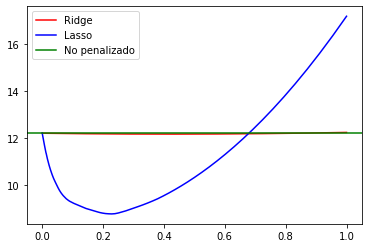

In [ ]:
plt.plot(alpha, error_ridge, color='r', label='Ridge')
plt.plot(alpha, error_lasso, color='b', label='Lasso')
plt.axhline(y=lm_error, color='g', label='No penalizado')
plt.legend()

In [ ]:
# Optimal alpha ridge
smallest_error_ridge = np.min(error_ridge)
optimal_alpha_ridge = alpha[np.argmin(error_ridge)]

# Optimal alpha lasso
smallest_error_lasso = np.min(error_lasso)
optimal_alpha_lasso = alpha[np.argmin(error_lasso)]

print(f'El error del modelo no penalizado es: {np.round(lm_error, 2)}.')
print(f'El error óptimo con el modelo ridge es: {np.round(smallest_error_ridge, 2)}.')
print(f'El error óptimo con el modelo lasso es: {np.round(smallest_error_lasso, 2)}')

El error del modelo no penalizado es: 12.21.
El error óptimo con el modelo ridge es: 12.17.
El error óptimo con el modelo lasso es: 8.77


Como era de esperar, el modelo lasso es el que tiene un menor error porque está haciendo una buena selección de las variables importantes. El modelo ridge y el modelo no penalizado están usando las 200 variables para hacer sus predicciones, y teniendo en cuenta que 190 de esas variables no son importantes, estas predicciones no son muy fiables. 

Por último, veamos cómo de buena ha sido la selección de variables del lasso. Para ello resolvemos de nuevo un modelo ridge y uno lasso usando ahora directamente el valor óptimo de $\alpha$ en cada caso.

In [ ]:
# Ridge regression
ridge_regression = Ridge(alpha=optimal_alpha_ridge)
ridge_regression.fit(x_train, y_train)
prediction = ridge_regression.predict(x_test)
ridge_coef = ridge_regression.coef_

# Lasso regression
lasso_regression = Lasso(alpha=optimal_alpha_lasso)
lasso_regression.fit(x_train, y_train)
prediction = lasso_regression.predict(x_test)
lasso_coef = lasso_regression.coef_

Y aquí calcularemos la tasa de correctamente clasificados. Sabemos que en el conjunto de datos hay 10 coeficientes $\beta$ que son distintos de $0$ y el resto son todos $0$ así que veamos cuantos de los coeficientes distintos de $0$ el lasso ha seleccionado como distintos de $0$ y cuantos que eran $0$ el lasso ha seleccionado como $0$. También calcularemos la tasa de correctamente clasificados del ridge, aunque aquí sabemos de antemano cual va a ser el resultado: como utiliza todas las variables para hacer predicciones, solo va a haber clasificado correctamente los $10$ coeficientes distintos de $0$.

In [ ]:
tol = 1e-4
bool_non_zero_true_beta = np.abs(true_beta) > tol
bool_non_zero_pred_beta_lasso = np.abs(lasso_coef) > tol
bool_non_zero_pred_beta_ridge = np.abs(ridge_coef) > tol

correct_selection_rate_lasso = np.sum(bool_non_zero_true_beta == bool_non_zero_pred_beta_lasso) / len(lasso_coef)
correct_selection_rate_ridge = np.sum(bool_non_zero_true_beta == bool_non_zero_pred_beta_ridge) / len(lasso_coef)


print(f'Lasso. Tasa de coeficientes correctamente clasificados: {np.round(correct_selection_rate_lasso, 3)}')
print(f'Ridge. Tasa de coeficientes correctamente clasificados: {np.round(correct_selection_rate_ridge, 3)}')

Lasso. Tasa de coeficientes correctamente clasificados: 0.94
Ridge. Tasa de coeficientes correctamente clasificados: 0.05


El lasso ha seleccionado correctamente el $94\%$ de las variables, mientras que ridge solo ha seleccionado correctamente el $5\%$. Esto demuestra la enorme potencia del lasso cuando trabajamos con conjuntos de datos de alta dimensión, y explica también por qué se ha convertido en una de las técnicas de selección de variables más utilizadas hoy en día.

Aquí termina nuestra introducción a los modelos de regresión lasso, pero si quereis aprender más sobre otras técnicas estadísticas ¡estad atentos a los siguientes posts!

## Acerca del autor
###**Álvaro Méndez Civieta**
Álvaro Méndez obtuvo el título en matemáticas en 2015 por la Universidad de Oviedo, y el master en Big Data Analytics por la Universidad Carlos III en 2016. Después de un año trabajando en la consultora Accenture se unió al programa de doctorado de ingeniería matemática de la Universidad Carlos III, donde continúa trabajando en el desarrollo de modelos de selección de variables en espacios de alta dimensión, con aplicaciones al campo de la genética.
